In [6]:
from itertools import pairwise
import random

class Sequence:
    N = 10
    L = 70

    def __init__(self, seq=None): 
        if seq:
            self.seq = seq
        else: 
            self.seq = ['N'] * 10
            
    def random_move(self):
        '''
        Every move, Chose an amino acid. 
        Then with probability P, propose. to pair it, and 
        With 1-P, propose to unpair it
        '''
        new_seq = self.seq.copy()
        index = random.randint(0, self. N-1)
        
        other_P = self.seq.count('P') - (self.seq[index] == 'P')
        
        if other_P == 0: # case 1
            p = 1 / ((self.L - 1 + 2 * index) ** (1.5))
        else: # case 2
            p = 0.25 
        
        if self.seq[index] == 'P':
            p = 1 - p
            

        if random.random() < p:
            if self.seq[index] == 'P':
                new_seq[index] = 'N'
            else:
                new_seq[index] = 'P'
        
        return Sequence(new_seq)

    def get_potential_energy(self) -> int:
        return -self.seq.count('P')
    
    def get_total_pairings(self) -> int:
        return self.seq.count('P')
    
s = Sequence()
s.random_move()

In [7]:
import math
from tqdm import tqdm
from functools import lru_cache

@lru_cache(maxsize=None)
def monte_carlo_algorithm(start_after: int = 1_000, iterations: int = 1_00_000, KT: int = 1):
    '''
    Naive implementation without a convergence check, just goes for a fixed number of iterations
    Psuedo code:
        1. Initialize any seq X(0)
        2. Propose a new seq X(1)
        3. Compute energy difference: E(X(1)) - E(X(0))
        
        if dE < 0:
            accept X(1)
        else:
            accept X(1) with probability exp(-dE / kT)
        
        4. Iterate until convergence
    
    Returns a list of distribution of seqs
    '''
        
    current_seq = Sequence()
    seq_history = []
    
    for i in range(iterations):
        proposed = current_seq.random_move()
        energy_difference = proposed.get_potential_energy() - current_seq.get_potential_energy()
        
        if energy_difference < 0 or random.random() < math.exp(-energy_difference / KT):
            current_seq = proposed
            
        if i > start_after:
            seq_history.append(current_seq)
    
    return seq_history

KT = 0.3
seq_history = monte_carlo_algorithm(iterations=1300, KT=KT)
seq_history[-1].seq

['N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N']

/var/folders/d8/6961hjxn69l6pchnksn1_83w0000gn/T/ipykernel_34066/3792393636.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap = cm.get_cmap('jet', len(POSS_KT))


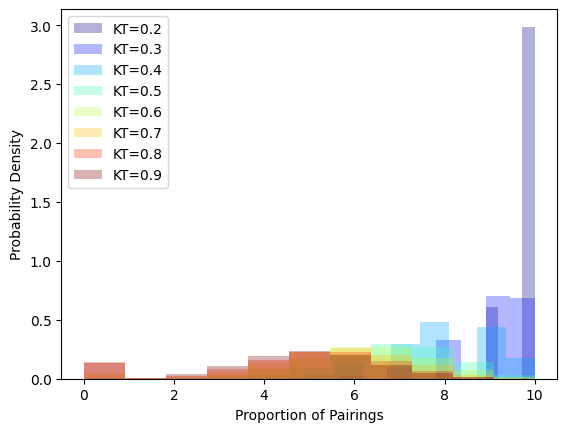

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import math

POSS_KT = np.arange(0.2, 1, 0.1)
colormap = cm.get_cmap('jet', len(POSS_KT)) 

for i, KT in enumerate(POSS_KT):
    seq_history = monte_carlo_algorithm(KT=KT)
    p_count = [seq.get_total_pairings() for seq in seq_history]
    color = colormap(i / (len(POSS_KT) - 1))
    plt.hist(p_count, bins=11, density=True, alpha=0.3, label=f'KT={round(KT, 2)}', color=color)
    
plt.xlabel('Proportion of Pairings')
plt.ylabel('Probability Density')
plt.legend()
plt.show()
plt.close()

/var/folders/d8/6961hjxn69l6pchnksn1_83w0000gn/T/ipykernel_34066/1015533187.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap = cm.get_cmap('jet', len(POSS_KT))


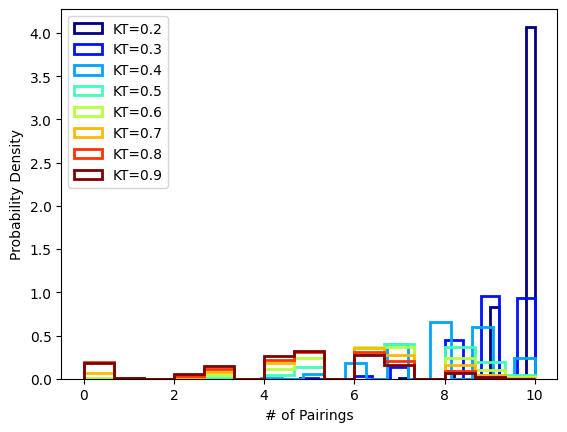

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import math

POSS_KT = np.arange(0.2, 1, 0.1)
colormap = cm.get_cmap('jet', len(POSS_KT))

for i, KT in enumerate(POSS_KT):
    seq_history = monte_carlo_algorithm(KT=KT)
    h_counts = [seq.get_total_pairings() for seq in seq_history] 

    color = colormap(i / (len(POSS_KT) - 1))
    plt.hist(h_counts, bins=15, density=True, histtype='step', label=f'KT={round(KT, 2)}', color=color, linewidth=2)
    
plt.xlabel('# of Pairings')
plt.ylabel('Probability Density')
plt.legend()
plt.show()
plt.close()


100%|██████████| 199/199 [00:03<00:00, 52.83it/s]


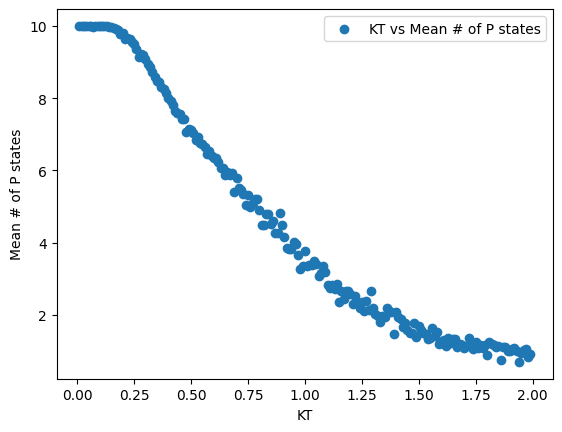

In [14]:
import numpy as np
from tqdm import tqdm
POSS_KT = np.arange(0.01, 2, 0.01)

means = []
for KT in tqdm(POSS_KT):
    seq_history = monte_carlo_algorithm(KT=KT)
    p_count = [seq.get_total_pairings() for seq in seq_history] 
    means.append(np.mean(p_count))
    
plt.scatter(POSS_KT, means, label='KT vs Mean # of P states')
plt.xlabel('KT')
plt.ylabel('Mean # of P states')
plt.legend()
plt.show()
plt.close()